In [155]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import numpy as np
import pandas as pd
from vega_datasets import data as vds
from branca.element import Figure
import statistics
import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image
from IPython.core.display import Image 

In [151]:
#Funciones
#Unifica los sectores de manufactura
def unificando_man(x):    
    x = re.sub(r'C10\.\d+.*', 'C10 - Manufacture of food products', x)
    return x
#pasa carácters a mínusculas, quita espacios de mas y reemplaza puntos por nada.
def limpiar_caracteres(x):
    x = x.lower().strip().replace('-','').replace('.','')
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        x = x.replace(a, b)
    return x

In [223]:
data = pd.read_csv("dataCleaned.csv")
data.tail()
data.shape

(329, 33)

In [148]:
data.columns.tolist()

['Unnamed: 0',
 'Name',
 'Country',
 'Address',
 'Sector',
 'Owner_operator',
 'Solar thermal engineering company',
 'Integrator company',
 'Year',
 'Collector technology',
 'Collector name',
 'Gross area',
 'Total aperture area',
 'Thermal power',
 'heat transfer fluid',
 'Energy storage',
 'Storage volume',
 'Conventional heat source',
 'Fuel used',
 'Use',
 'Unit operation',
 'Point of integration',
 'Temperature range process',
 'Temperature range solar loop (min/max)',
 'Total investment costs',
 'Subsidy',
 'System life time',
 'Specific investment costs',
 'Solar fraction',
 'Contact',
 'E-mail',
 'Homepage',
 'Sector grouped']

In [212]:
#Datos de las tecnologías instaladas
data['Collector technology'] = data['Collector technology'].astype(str)
data['Collector technology'] = data['Collector technology'].apply(limpiar_caracteres)
data['Collector technology'] = data['Collector technology'].replace('other or various collectors','various collector')

collector_tech = (
    data
        .groupby('Collector technology')
        .count()
)
collector_tech = collector_tech[['Name']].sort_values('Name',ascending = False).reset_index()
collector_tech = collector_tech.drop([7], axis=0)
collector_tech

,Collector technology,Name
0,flat plate collector,149
1,parabolic trough collector,59
2,evacuated tube collector,48
3,various collector,31
4,air collector,21
5,fresnel collector,13
6,unglazed collector,3


In [200]:
#Datos de numero de instalaciones por país
data.dtypes
data['Country'] = data['Country'].astype(str)
data['Country'] = data['Country'].apply(limpiar_caracteres)
instalaciones_pais=pd.DataFrame(data['Country'].value_counts()).reset_index()   
instalaciones_pais.head()
#print(instalaciones_pais)
#instalaciones_pais.index
len(instalaciones_pais['index'])

40

In [202]:
#Datos de potencia instalada por país
sum_pais = (
    data
        .groupby('Country')
        .sum()
)
energia_pais = sum_pais[['Gross area','Thermal power']].sort_values('Thermal power',ascending = False).reset_index()
energia_pais.head()

,Country,Gross area,Thermal power
0,oman,210000.00,100000.00
1,china,47244.70,29696.29
2,chile,39740.00,27818.00
3,united states,24144.40,16860.58
4,mexico,25205.68,14927.36


In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);
pie.savefig("DeliveryPieChart.png")

In [73]:
mapaMarker = folium.Map()

In [76]:
#Añadiendo los marcadores
noencontrados = []
for i in range(0,328):
    dir = geocoder.osm(data['Address'][i])
    latlong = [dir.lat, dir.lng]
    print(latlong)
    if latlong  != [None, None]:
        folium.Marker(
            latlong, 
            popup=data['Solar thermal engineering company'][i], 
            icon=folium.Icon(color="green", icon="leaf", prefix="fa"),
            tooltip=data['Name'][i]).add_to(mapaMarker)
        
    else :
        noencontrados.append(i)
#visualizamos
print(noencontrados)


[31.9332996, 34.9326218]
[None, None]
[None, None]
[38.246242, 21.7350847]
[35.7079146, -79.8136446]
[37.2575874, -6.9484945]
[42.5797194, -72.2159994]
[19.9509404, -102.3075032]
[None, None]
[19.7027116, -101.1923818]
[None, None]
[32.5010188, -116.9646629]
[37.9839412, 23.7283052]
[40.6403167, 22.9352716]
[40.6403167, 22.9352716]
[9.969664300000002, 77.47420048524822]
[None, None]
[-24.673611, 30.328333]
[44.06812915, 25.18653177142434]
[37.2575874, -6.9484945]
[14.3189468, 100.5111681]
[16.8502534, 74.5948885]
[30.9090157, 75.851601]
[20.9670759, -89.6237402]
[None, None]
[42.2103722, -73.3389121]
[None, None]
[43.1722983, -73.3276101]
[45.6000922, 9.6102404]
[28.42826235, 77.00270014657752]
[None, None]
[20.6720375, -103.3383962]
[-25.7678012, 29.4555234]
[20.7211203, -103.3913671]
[38.8959791, -77.0709087]
[59.3251172, 18.0710935]
[32.5500933, -115.1912074]
[46.5802596, 0.340196]
[42.7838784, 2.8989143]
[48.7229168, 10.4129616]
[48.7188636, 10.4135869]
[50.4500336, 30.5241361]
[42

In [78]:
print(len(noencontrados))

88


In [88]:
mexico = pd.read_csv("mexico.csv")
mexico.tail()

,Unnamed: 0,Name,Country,Address,Sector,Owner_operator,Solar thermal engineering company,Integrator company,Year,Collector technology,...,Temperature range solar loop (min/max),Total investment costs,Subsidy,System life time,Specific investment costs,Solar fraction,Contact,E-mail,Homepage,Sector grouped
78,310,UNISON,mexico,"Blvd. Luis Encinas J, Calle Av. Rosales &, Cen...",P- Education,UNISON,modulo solar,modulo solar,2018-01-01,various collector,...,50-80,90000.0,No Subsidies,25,354.33,55.0,NaN,NaN,NaN,P- Education
79,318,Zacatecas Termosolar Drying plant - Air Collec...,mexico,Carretera Zacatecas - Fresnillo KILOMETRO 21.5...,C10.3 - Processing and preserving of fruit and...,Secampo Zacatecas,modulo solar,modulo solar,2017-01-01,air collector,...,55-130,24000.0,50,25,200.00,70.0,NaN,NaN,NaN,C10 - Manufacture of food products
80,319,Zacatecas Termosolar Drying plant - Flate Plate,mexico,Carretera Zacatecas - Fresnillo KILOMETRO 21.5...,"A - Agriculture, forestry and fishing",Secampo Zacatecas,modulo solar,modulo solar,2017-01-01,flat plate collector,...,50-85,30370.0,50,NaN,242.96,75.0,NaN,NaN,NaN,"A - Agriculture, forestry and fishing"
81,321,Diversey Tlaneplantla,mexico,"Calle Henry Ford 12, Industrial San Nicolas CP...",C20 - Manufacture of chemicals and chemical pr...,DIVERSEY,modulo solar,modulo solar,2019-01-01,unglazed collector,...,35-50,37600.0,No subsidies,20,112.24,65.0,MODULO SOLAR,generalsolar@modulosolar.com.mx,www.modulosolar.com.mx,C20 - Manufacture of chemicals and chemical pr...
82,323,BOCAR GROUP,mexico,Circuito de la Industria Norte 6 Parque Indust...,"C29 - Manufacture of motor vehicles, trailers ...",BOCAR GROUP,modulo solar,modulo solar,2019-01-01,flat plate collector,...,45-75,45000.0,No subsidies,25,350.00,70.0,MODULO SOLAR,generalsolar@modulosolar.com.mx,www.modulosolar.com.mx,"C29 - Manufacture of motor vehicles, trailers ..."


In [124]:
ne_mexico = []
grossarea = []
datos_fechas = []
for i in range(0,82):
    dir = geocoder.osm(mexico['Address'][i])
    intensidad = [dir.lat,dir.lng, mexico['Gross area'][i]]
    latlong = [dir.lat, dir.lng]
    if latlong  != [None, None]:
        grossarea.append(intensidad)
        datos_fechas.append(mexico['Year'])
    else :
        ne_mexico.append(i)
print('Proceso finalizado')
print('No encontrados en el mapa',len(ne_mexico))

Proceso finalizado
No encontrados en el mapa 38


In [135]:
mapaGrossArea.save('mexico.html')

In [146]:
#hacemos el mapa
mapaCalorTiempo = folium.Map([19, -99], zoom_start=6)

#agregamos el layer del mapa de calor
heatmap = plugins.HeatMapWithTime(coordenadas, index=datos_fechas)
heatmap.add_to(mapaCalorTiempo)

#visualizamos
#mapaCalorTiempo



In [145]:
coordenadas = []
for a in grossarea:
    coordenadas.append([a[0], a[1]])
#coordenadas

In [142]:
i = Image.open('chart.png','r')
i.show()

NameError: name 'tecnology' is not defined

### Instalaciones de calentamiento solar para procesos industriales en el mundo

In [134]:

mapaMarker.save('Ship.html')
mapaMarker

In [222]:
# Las tencologías de colectores que se estan usando definen las temperaturas que pueden alcanzar. 

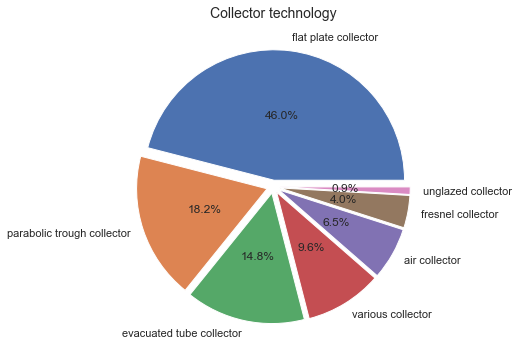

In [215]:
#pie chart collectors technology 
pie, ax = plt.subplots(figsize=[10,6])
labels = collector_tech['Collector technology']
plt.pie(x=collector_tech['Name'], autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5)
plt.title("Collector technology", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

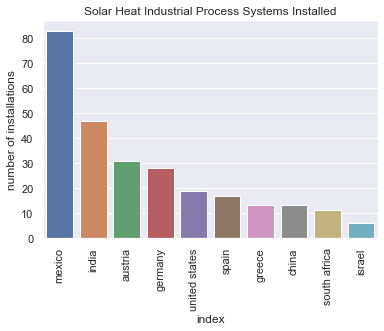

In [221]:


sns.set(style="darkgrid")
ax = sns.barplot(x=instalaciones_pais['index'][:10], y=instalaciones_pais['Country'])
ax.set( ylabel = 'number of installations')
#labels = instalaciones_pais['index']
#ax.set(ylim=(0, 83))
ax.set_title('Solar Heat Industrial Process Systems Installed')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

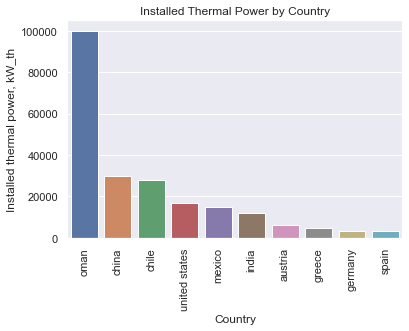

In [207]:
#Energía acumulada
sns.set(style="darkgrid")
ax = sns.barplot(x=energia_pais['Country'][:10], y=energia_pais['Thermal power'])
ax.set( ylabel = 'Installed thermal power, kW_th')
#labels = instalaciones_pais['index']
#ax.set(ylim=(0, 83))
ax.set_title('Installed Thermal Power by Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

### ¿Para que se usa el calor solar en la industria?

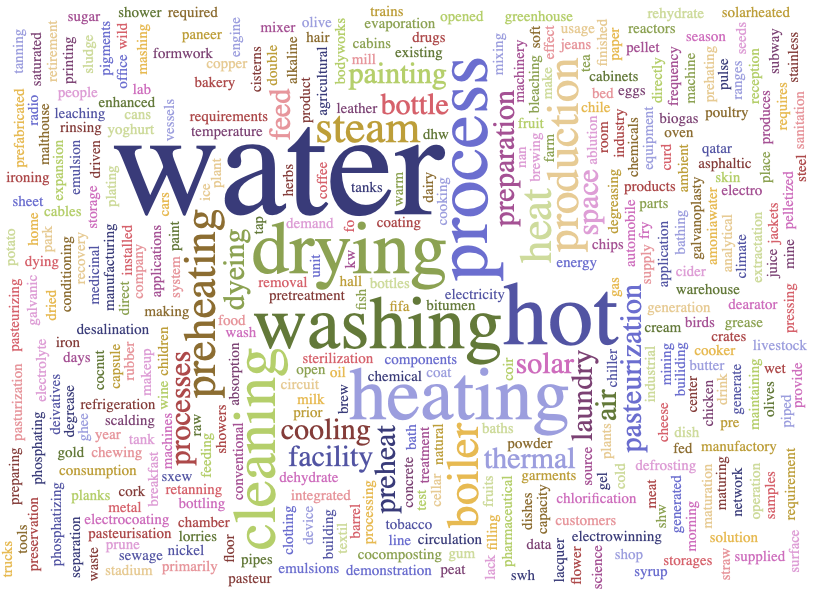

In [144]:
display(Image(filename='chart.png'))

### Instalaciones de calor solar por tamaño en metros cuadrados

In [126]:
mapaGrossArea = folium.Map(location=[19, -99], zoom_start=5)
plugins.HeatMap(grossarea).add_to(mapaGrossArea)
mapaGrossArea